In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

prepared = pd.read_csv('prepared_winemag-data-130k-v2.csv')

In [3]:
filtered = prepared.reindex(columns=['country', 'province', 'variety', 'winery', 'region_1', 'price', 'points'])
display(filtered)


,country,province,variety,winery,region_1,price,points
0,2,1,0,0,0,0.064935,0.35
1,2,2,1,1,1,0.058442,0.35
2,2,1,2,2,0,0.396104,0.35
3,3,3,3,3,2,0.071429,0.35
4,0,4,4,4,3,0.077922,0.35
...,...,...,...,...,...,...,...
100342,4,5,0,6809,4,0.155844,0.50
100343,2,1,2,6027,12,0.461039,0.50
100344,4,5,5,8789,4,0.168831,0.50
100345,4,5,0,4214,4,0.181818,0.50


# Considerando somente preço   

In [4]:
X = filtered['price'].values.reshape(-1, 1)
y = filtered['points'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

model_considering_only_price = model

In [6]:
y_pred = model.predict(X_test)

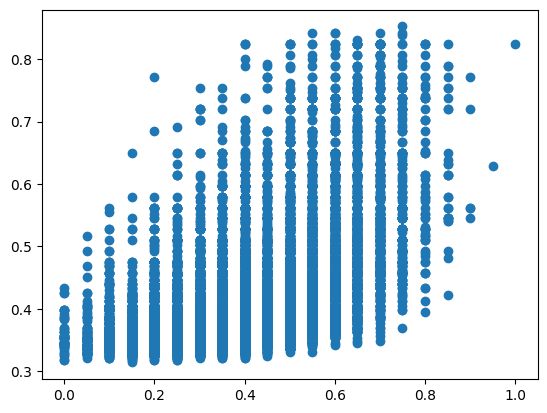

In [7]:
plt.scatter(y_test, y_pred)
plt.show()

In [8]:
print(f"Erro Quadrado Médio: {mean_squared_error(y_pred, y_test)}")
print(f"Erro Absoluto Médio: {mean_absolute_error(y_pred, y_test)}")
print(f"Score: {model.score(X_test, y_test)}")

Erro Quadrado Médio: 0.016039311633173188
Erro Absoluto Médio: 0.1017817788874646
Score: 0.2967198072608732


# Considerando todas as variáveis numéricas

In [9]:
display(filtered)

,country,province,variety,winery,region_1,price,points
0,2,1,0,0,0,0.064935,0.35
1,2,2,1,1,1,0.058442,0.35
2,2,1,2,2,0,0.396104,0.35
3,3,3,3,3,2,0.071429,0.35
4,0,4,4,4,3,0.077922,0.35
...,...,...,...,...,...,...,...
100342,4,5,0,6809,4,0.155844,0.50
100343,2,1,2,6027,12,0.461039,0.50
100344,4,5,5,8789,4,0.168831,0.50
100345,4,5,0,4214,4,0.181818,0.50


In [10]:
X = filtered.iloc[:, :-1].values
y = filtered['points'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

most_promising_model = model

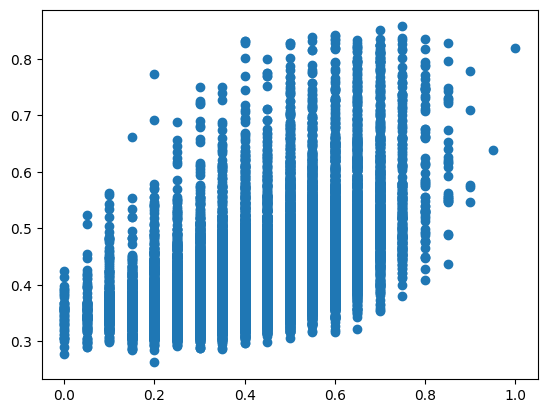

In [12]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.show()

In [13]:
print(f"Erro Quadrado Médio: {mean_squared_error(y_pred, y_test)}")
print(f"Erro Absoluto Médio: {mean_absolute_error(y_pred, y_test)}")
print(f"Score: {model.score(X_test, y_test)}")

Erro Quadrado Médio: 0.015862007520173443
Erro Absoluto Médio: 0.101347853298851
Score: 0.3044941103990455


# Regressão Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor

X = filtered.iloc[:, :-1].values
y = filtered['points'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=100)
rf_regressor.fit(X_train, y_train)

rf_y_pred = rf_regressor.predict(X_test)


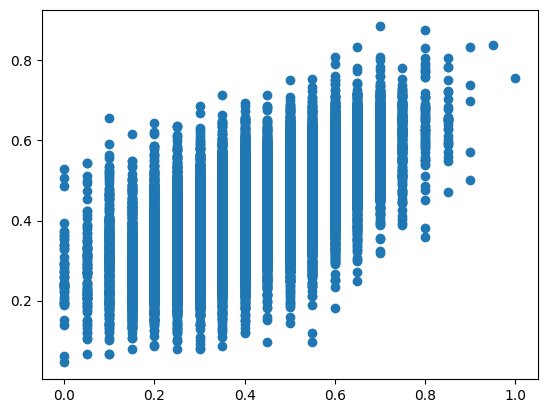

Erro Quadrado Médio: 0.01244872971572369
Erro Absoluto Médio: 0.08493827825237878
Score: 0.454157058977263


In [15]:
plt.scatter(y_test, rf_y_pred)
plt.show()

print(f"Erro Quadrado Médio: {mean_squared_error(rf_y_pred, y_test)}")
print(f"Erro Absoluto Médio: {mean_absolute_error(rf_y_pred, y_test)}")
print(f"Score: {rf_regressor.score(X_test, y_test)}")

# SVC

In [16]:
with_category = filtered
bins = [0, 0.33, 0.67, 1]
labels = [0, 1, 2]
with_category['points'] = pd.cut(prepared['points'], bins=bins, labels=labels, include_lowest=True)
display(with_category)
display(with_category['points'].value_counts())

,country,province,variety,winery,region_1,price,points
0,2,1,0,0,0,0.064935,1
1,2,2,1,1,1,0.058442,1
2,2,1,2,2,0,0.396104,1
3,3,3,3,3,2,0.071429,1
4,0,4,4,4,3,0.077922,1
...,...,...,...,...,...,...,...
100342,4,5,0,6809,4,0.155844,1
100343,2,1,2,6027,12,0.461039,1
100344,4,5,5,8789,4,0.168831,1
100345,4,5,0,4214,4,0.181818,1


points
1    69317
0    26701
2     4329
Name: count, dtype: int64

In [17]:
from sklearn.svm import SVC

X = with_category.iloc[:, :-1].values
y = with_category['points'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

svc_model = model

In [18]:
y_pred = model.predict(X_test)

In [19]:
print(f"Erro Quadrado Médio: {mean_squared_error(y_pred, y_test)}")
print(f"Erro Absoluto Médio: {mean_absolute_error(y_pred, y_test)}")
print(f"Score: {model.score(X_test, y_test)}")

Erro Quadrado Médio: 0.3133034379671151
Erro Absoluto Médio: 0.3133034379671151
Score: 0.6866965620328849


## Validação cruzada


In [20]:
scores = cross_validate(model_considering_only_price, X, y, cv=5)
display(scores)

{'fit_time': array([0.02353716, 0.0304122 , 0.03895211, 0.03180885, 0.02632809]),
 'score_time': array([0.00159955, 0.00167322, 0.00628114, 0.00161886, 0.0015223 ]),
 'test_score': array([0.18064975, 0.20567806, 0.16185113, 0.18782072, 0.19586161])}

In [21]:
scores = cross_validate(most_promising_model, X, y, cv=5)
display(scores)

{'fit_time': array([0.06485677, 0.0609355 , 0.05649972, 0.05691528, 0.05447721]),
 'score_time': array([0.00349569, 0.0018115 , 0.0016737 , 0.00445747, 0.00358272]),
 'test_score': array([0.18064975, 0.20567806, 0.16185113, 0.18782072, 0.19586161])}

In [22]:
scores = cross_validate(rf_regressor, X, y, cv=5)
display(scores)

{'fit_time': array([28.72417736, 27.25488877, 27.41976881, 27.28996062, 27.69162107]),
 'score_time': array([0.52181625, 0.54874921, 0.55797696, 0.55796838, 0.55892467]),
 'test_score': array([0.26590506, 0.3018007 , 0.24152843, 0.27244507, 0.28292073])}